# Predicting heart disease using machine learning 

This notebook looks into using various Phyton-based machine learning and data science libraries in an attempt to build a machine learning model with a good capacity of predicting whether a patient have heart-disease or not based on their medical attributes.


Framework to follow throughout this project;
1. Defining the problem(Problem definiation)
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation 


# Problem definition 

>Given the clinical parameter about patients, can we predict whether or not they have heart disease?


# Data

The original data came from the Cleavland data from the UCI machine learning respiratory 
https://archive.ics.uci.edu/ml/datasets/heart+disease

There are so some version of it on Kaggle

# Evaluation 

> if we can reach 95% accuracy of prediction with the datasets during the proof of concepts, then we pursue this project 

# Features

This is where you will get different informations about each features in your data.

Where we have the dictionary as seen below 

#Creating a data dictionary 

Attributes

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic 
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
    condition: 0 = no disease, 1 = disease


In [3]:
# Preparing our tools 

#Getting our tools ready/Importing all the tools we need 
#We are going to use Pandas, Numpy, Matplotlib, for data anlysis and manipulation

#Import all the tools we need 

#Regular EDA(Exploratory data analysis) and plotting libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#we want our plot to appear inside the notebook 

%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [4]:
#Manual installation of the searbon packages 
!pip install seaborn

In [62]:
import seaborn as sns

# Load data

In [8]:
df=pd.read_csv("heart-disease.csv")

In [11]:
df.shape #(rows and columns)

(303, 14)

# Data exploration

( Where you will get to know the datasets we are working with the more)

For example lets explore based on the folowing;
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types
3. What is missing from the data and how do we deal with it 
4. Where are the outliers annd why should we care about them
5. How can you add, change or remove features to get more out of your data
6. Comparing columns 

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
#How many class of yes to heart disease and no heart disease are there

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

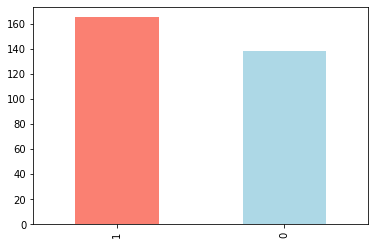

In [21]:
#Give a little barplot to compare 
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
#Check for missing value 

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Comparing different column to each other

#Heart diseases frequency according to sex


In [27]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [32]:
#Compare sex to target column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


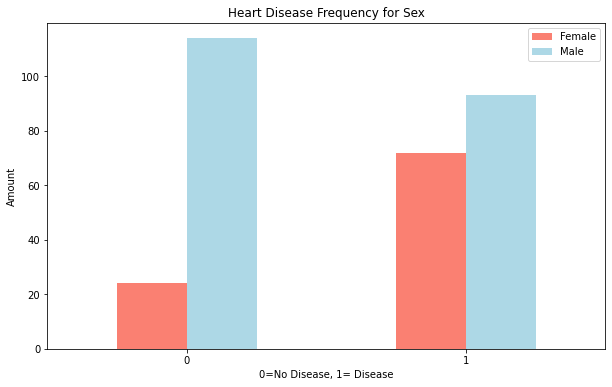

In [35]:
#Create a plot of the crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

#In further comparison, lets compare thalach, age and target column

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

#Comparing Age column with the Thalach column(Max Rate for Heart Disease)

In [39]:
#Create a scatter plot to compare. 

#Steps 

#1create a plot figure(Implies X and Y axis)
#2 plot your data. 



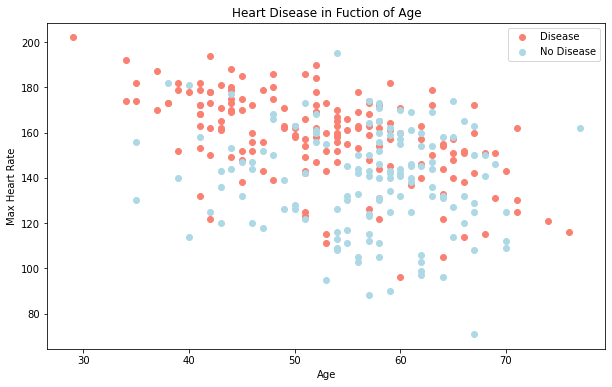

In [48]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

#Include the negative case of no heart-disease

plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue");

#Add a little bit info to the plot 
plt.title("Heart Disease in Fuction of Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);





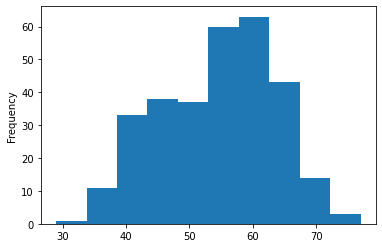

In [49]:
#Check Age distribution using the histogram distribution plot 
df.age.plot.hist();

# Heart disease frequency per chest pain type 

 #cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic 

In [51]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


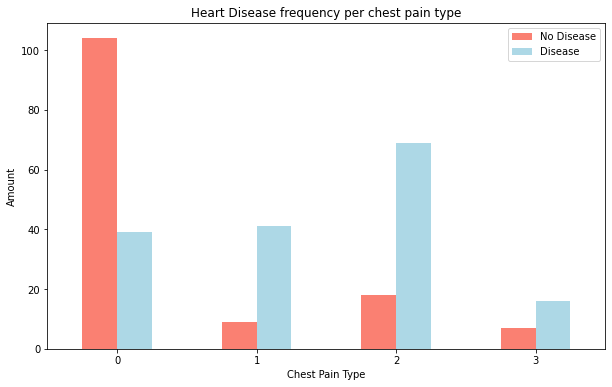

In [56]:
#Making the crosstab more visual 

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

#Add some information 
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);



In [57]:
#Check for the correlations amidst variabes 

df.corr()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


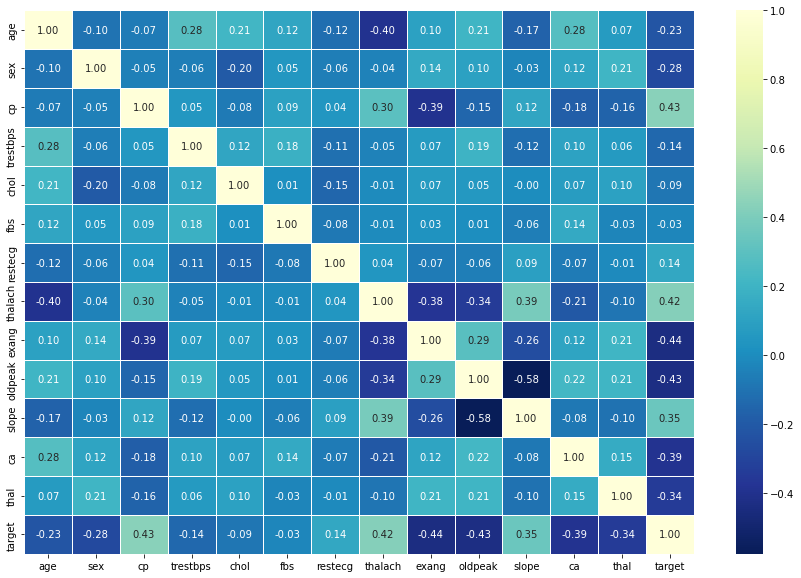

In [70]:
#Make the correlations more visual by creating a correlation matrix with it.

#Steps
#1 Define the corr matrix
#2 Set the figure size and axis 

corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu_r");

bottom, top = ax.get_ylim()



# MODELLING

#In this stage we train and our data 

#Steps in Modelling

#1Split your data into x and y 
#2Split into train and test sets using the train test splits 
#3Picking your model 

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
x=df.drop("target", axis=1)
y=df.target

In [93]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [94]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [101]:
#Split into train test split 
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [98]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [99]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


#Now we have split our data into train and test sets, we build a machine learning model by picking our model 
#Picking our model require visiting the machine lerning map to see suitables model, we going to try out three
#By so doing we are experimenting 
#we are going to try out three differrnt models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
2. Random Forest Classifier 

In [102]:
#Using logistic Regression 

np.random.seed(42)

ModellR=LogisticRegression()

#Fit model 

ModellR.fit(x_train, y_train)
ModellR.score(x_test, y_test)

C:\Users\44789\Documents\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [207]:
#Using K-Nearest Neighbours Classifier

np.random.seed(42)

KNN=KNeighborsClassifier()

#Fit model 

KNN.fit(x_train, y_train)

KNN.score(x_test, y_test)

0.6885245901639344

In [208]:
KNN.score(x_train,y_train)

0.7603305785123967

In [105]:
#Using RandomForest Classifier

np.random.seed(42)

clf=RandomForestClassifier()

#Fit model 

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8360655737704918

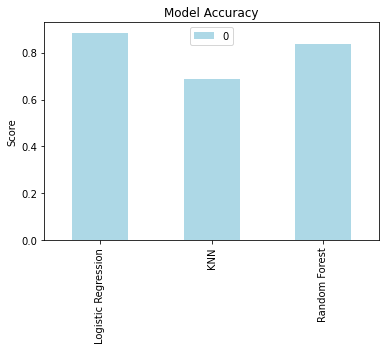

In [179]:
Model_compare=pd.DataFrame([ModellR.score(x_test, y_test), KNN.score(x_test, y_test), 
                           clf.score(x_test, y_test)], index=["Logistic Regression", "KNN", "Random Forest"])

Model_compare.plot(kind="bar",color=["lightblue"])

plt.title("Model Accuracy")
plt.ylabel("Score"); 


In [180]:
#Now we have got our base model, we need to taste it further for improvement
#What we should look at in testing our model further 

#1Hyperparametertunning 
#2Feature Importance
#3Confusion Matrix
#4Cross Validation
#Precision 
#Recall
#FL score 
#Classification report 
#ROC curve
#Area under the cover(AUC)

In [181]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [185]:
ModellR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [186]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [187]:
Classifiers_score=[ModellR.score(x_test, y_test), KNN.score(x_test, y_test), 
                           clf.score(x_test, y_test)]

In [189]:
Classifiers_score

[0.8852459016393442, 0.6885245901639344, 0.8360655737704918]

In [190]:
Classifiers=("Logistic Regression", "KNN", "Random Forest")

In [191]:
Classifiers

('Logistic Regression', 'KNN', 'Random Forest')

In [204]:
pd.DataFrame({"Name":Classifiers, "Score":Classifiers_score})

,Name,Score
0,Logistic Regression,0.885246
1,KNN,0.688525
2,Random Forest,0.836066


# Improving our label via Tunning 
Tuning KNN hyper-parameters by hand 


In [205]:
#lets tune KNN by hand

KNN.get_params()



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [212]:
#Create a list of test and train scores 
#We are tunning the params n_neighbors
np.random.seed(42)

train_scores =[]
test_scores =[]

#Create a list for the n_neighbors( we have the initial to be 5, in the baseline model)

neighbors=range(1,21)

#Set up KNN instance 

KNN=KNeighborsClassifier()

#loop the range of values in neighbors through knn/n_neigbours params

for items in neighbors:
    KNN.set_params(n_neighbors=items)
    
    #Fit the algorithm 
    KNN.fit(x_train, y_train)
    
    #Create the new list with the range of neigbors 
    
    train_scores.append(KNN.score(x_train, y_train))
    
    test_scores.append(KNN.score(x_test, y_test))



In [213]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [214]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


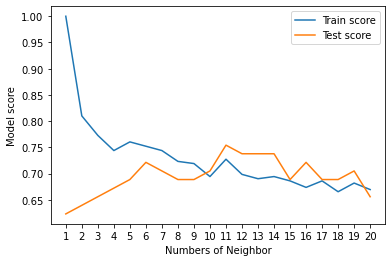

In [223]:
#Get the neighbor with the higest test value
plt.plot(neighbors,train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21))
plt.xlabel("Numbers of Neighbor");
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")


# Hyperparameter tunning by RandomizedsearchCV
#This method is applicable for when we need to tune more than one parameters

#Lets tune Logistic regression model and RandomForestcLassifier using the Randomized search Cv 

In [224]:
ModellR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [225]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [228]:
#Lets start with logistic regression 

#Tunning hyper parameters C and Solver

#Steps

#1 Create grid for logistic regression 

np.random.seed(42)

log_reg_grid= {"C": np.logspace(-4,4,20), "solver":["liblinear"]}
        

#for Random forest classifier(Lets tune n_estimators and )

rf_grid={"n_estimators": np.arange(10,1000,50), 
         "max_depth":[None, 3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}


#2 Use the grid created with the RandomizedSearchCv to tune both the logistic regression and Randon Forest cclaasifier

rs_log_reg=RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#3 Fit the model 

rs_log_reg.fit(x_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [229]:
#check the best params 

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [230]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [232]:
#Tune for RandomForestClassifier 

np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                         cv=5,
                         n_iter=20, 
                         verbose=True)

#fit the model


rs_rf.fit(x_train,y_train)
                         


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [233]:
#Check the best params 

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [234]:
rs_rf.score(x_test,y_test)

0.8688524590163934

# Hyper_Parameters Tuning with GridSearchCV

Lets tune Logistic Regression and RandomForestClassifier Using GridSearchCV 

In [239]:
np.random.seed(42)

#1grid- already created 

#1 Create grid for logistic regression 

np.random.seed(42)

log_reg_grid= {"C": np.logspace(-4,4,30), 
               "solver":["liblinear"]}



#2lets tune with GridSeachCv (No iteration in it case, its Auto)

gs_log_reg=GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, 
                        cv=5,
                        verbose=True)

#3 fit the model 

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [240]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [241]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

# Evaluating our Model 

#lets evaluate beyond accuracy using 

#1ROC curve and AUC score
#2Confusion Matrix
#3Classification report
#4Precision
#5Recall
#6F1-score

... using crossvalidation where possible 

In [242]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
